# Introduction to the Notebook
Welcome to this notebook on Loan Prediction Practice Problem. Below is a brief introduction of this notebook to get you acquainted with what you will be learning.

# Objective of the Notebook
This notebook is designed for people who want to solve binary classification problems using Python. By the end of this notebook, you will have the necessary skills and techniques required to solve such problems.


# Expectation from the Notebook
This notebook is divided into the below sections:

1.Introduction to the problem.

2.Exploratory Data Analysis (EDA) and PreProcessing.

3.Feature engineering and Model building.

# Table of Contents
Let’s look at the steps that we will follow in this notebook.

1.Problem Statement

2.Hypothesis Generation

3.Loading the data

4.Understanding the data

5.Exploratory Data Analysis (EDA)

i)Univariate Analysis

ii)Bivariate Analysis

6.Missing value and outlier treatment

7.Feature Engineering

8.Model Building :

i)Logistic Regression

ii) Decision Tree

iii) Random Forest

iv) Random Forest with Grid Search

v)XGBClassifier

# Problem Statement

Understanding the problem statement is the first and foremost step. This would help you give an intuition of what you will face ahead of time. Let us see the problem statement -

Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan. Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

This is a standard supervised classification task.A classification problem where we have to predict whether a loan would be approved or not. In a classification problem, we have to predict discrete values based on a given set of independent variable(s).Classification can be of two types

# Hypothesis Generation
After looking at the problem statement, we will now move into hypothesis generation. It is the process of listing out all the possible factors that can affect the outcome.

# What is hypothesis generation?¶
This is a very important stage in any data science/machine learning pipeline. It involves understanding the problem in detail by brainstorming as many factors as possible which can impact the outcome. It is done by understanding the problem statement thoroughly and before looking at the data.

# About The Data:

Given below is the description for each variable.

Variable ----- Description

Loan_ID -->> Unique Loan ID

Gender -->> Male/ Female

Married -->> Applicant married (Y/N)

Dependents -->> Number of dependents

Education -->> Applicant Education (Graduate/ Under Graduate)

Self_Employed -->> Self employed (Y/N)

ApplicantIncome -->> Applicant income

CoapplicantIncome -->> Coapplicant income

LoanAmount -->> Loan amount in thousands

Loan_Amount_Term -->> Term of loan in months

Credit_History -->> credit history meets guidelines

Property_Area -->> Urban/ Semi Urban/ Rural

Loan_Status -->> Loan approved (Y/N)

load important library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore") 

In [2]:
#  Read Train and test data 
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
#  create a copy of the data 
train_orignal = train.copy()
test_orignal = test.copy()

In [4]:
# Undertand the data 
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [6]:
# print the datatypes 

train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [8]:
# shape of data 

print('traning data shape ',train.shape)
train.head()

traning data shape  (614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
# print test data shape 

print('test data shape : ',test.shape)
test.head(10)

test data shape :  (367, 12)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban


# fill missing values

In [10]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [12]:
train['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [13]:
# fill Categorical column  Missing values 

for col in ['Gender','Married','Dependents','Self_Employed','Self_Employed']:
    train[col].fillna(train[col].mode()[0],inplace=True)

In [14]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Fill missing value in test datset

In [15]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [16]:
test["Gender"].fillna(test["Gender"].mode()[0],inplace=True)
test['Dependents'].fillna(test["Dependents"].mode()[0],inplace=True)
test["Self_Employed"].fillna(test["Self_Employed"].mode()[0],inplace=True)
test["Loan_Amount_Term"].fillna(test["Loan_Amount_Term"].mode()[0],inplace=True)
test["Credit_History"].fillna(test["Credit_History"].mode()[0],inplace=True)
test["LoanAmount"].fillna(test["LoanAmount"].median(),inplace=True)

In [17]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

# E D A 

Univariate Analysis

In [18]:
# Target variable 
# we will first look target varible 
# Frequency table of a variable will give us the count of each category in that variable

In [19]:
# train ['loan_status' .size]
train['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

size of target varible is 614
accept 422 and reject 192

In [20]:
# now normlize this column
train['Loan_Status'].value_counts(normalize=True)*100

Loan_Status
Y    68.729642
N    31.270358
Name: proportion, dtype: float64

68.72% are accepted and 31.27% are rejected 

<Axes: xlabel='Loan_Status'>

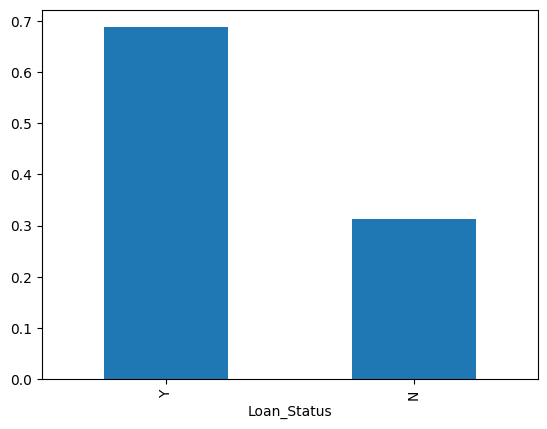

In [21]:
train['Loan_Status'].value_counts(normalize=True).plot(kind='bar')

<Axes: xlabel='Gender'>

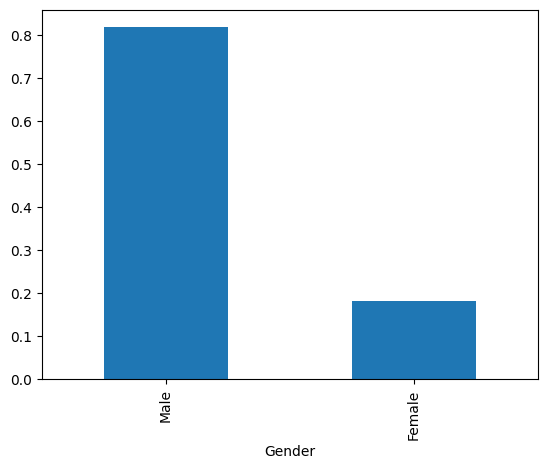

In [22]:
# independet varible (categorical )
# analyse gender column
train['Gender'].value_counts(normalize=True).plot(kind='bar')

81% are male and 18% are female 

In [23]:
# analys the married value

train['Married'].value_counts(normalize=True)*100

Married
Yes    65.309446
No     34.690554
Name: proportion, dtype: float64

Total number of people is 611 and 65% are married and 34% are unmarried 

In [24]:
# anlyze self emloyed column
train['Self_Employed'].value_counts(normalize=True)

Self_Employed
No     0.86645
Yes    0.13355
Name: proportion, dtype: float64

In [25]:
train['ApplicantIncome'].value_counts()

ApplicantIncome
2500     9
4583     6
6000     6
2600     6
3750     5
        ..
7660     1
5955     1
3365     1
2799     1
12841    1
Name: count, Length: 505, dtype: int64

<Axes: ylabel='ApplicantIncome'>

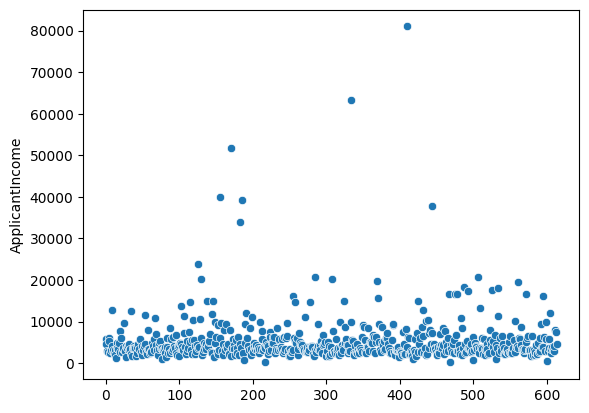

In [26]:
sns.scatterplot(train['ApplicantIncome'])

In [27]:
train['CoapplicantIncome'].value_counts()

CoapplicantIncome
0.0       273
1666.0      5
2083.0      5
2500.0      5
1625.0      3
         ... 
2232.0      1
2739.0      1
2210.0      1
461.0       1
2336.0      1
Name: count, Length: 287, dtype: int64

<Axes: xlabel='CoapplicantIncome', ylabel='Count'>

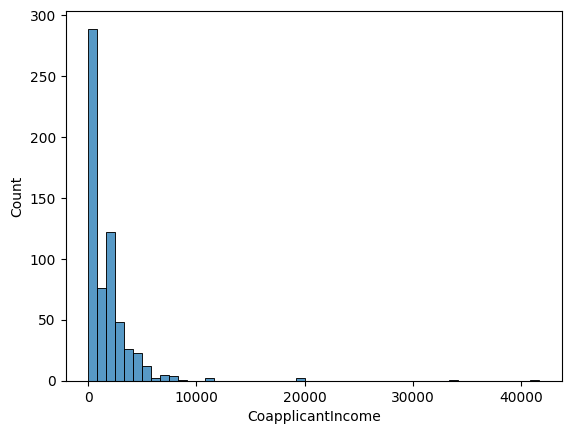

In [28]:
sns.histplot(train['CoapplicantIncome'])

In [29]:
train['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [30]:
# loand ammount term is a float column and it contain values in decimal points


<Axes: xlabel='Loan_Amount_Term', ylabel='count'>

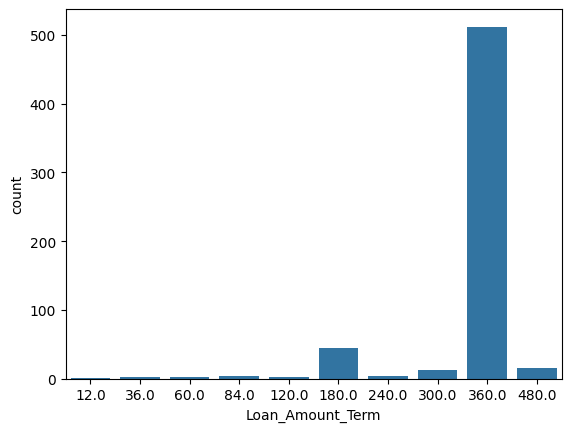

In [31]:
sns.countplot(x=train['Loan_Amount_Term'])

In [32]:
train['Credit_History'].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [33]:
# credit history has a float data types but it is not required i can change this datatyes into numerical 

In [34]:
train['Credit_History'] = train['Credit_History'].fillna(0).astype(int) 

In [35]:
train['Credit_History'].value_counts()

Credit_History
1    475
0    139
Name: count, dtype: int64

<Axes: xlabel='Property_Area'>

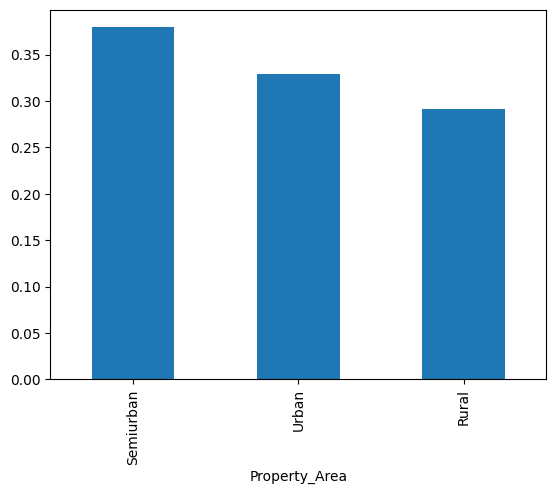

In [36]:
# now analyze Property Area 
train['Property_Area'].value_counts(normalize=True).plot(kind='bar')

Loan_Status
Y    422
N    192
Name: count, dtype: int64


<Axes: xlabel='Loan_Status'>

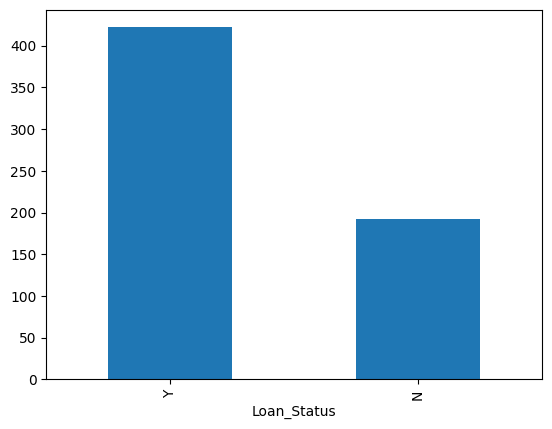

In [37]:
# Now analyze to loan status 

# it is our target column and prdict this 



print(train['Loan_Status'].value_counts())
train['Loan_Status'].value_counts().plot(kind='bar')

# Biavariate analysis

In [38]:
# independent variable vs target varible 

Loan_Status    N    Y
Gender               
Female        37   75
Male         155  347


Text(0, 0.5, 'Percentage')

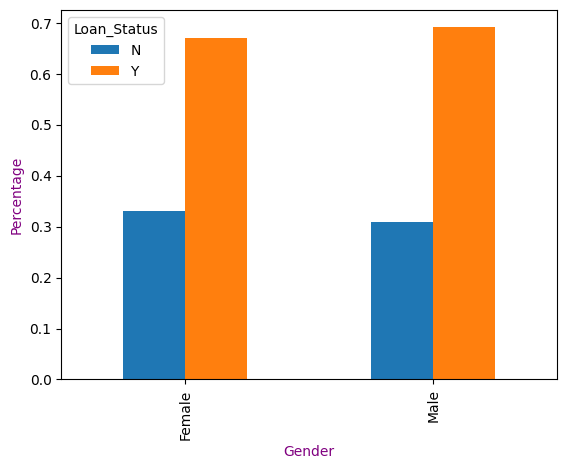

In [39]:
print(pd.crosstab(train['Gender'],train['Loan_Status']))

Gender_bin = pd.crosstab(train['Gender'],train['Loan_Status'])
Gender_bin.div(Gender_bin.sum(1).astype(float),axis=0).plot(kind='bar')

plt.xlabel('Gender',color = 'purple')
plt.ylabel('Percentage',color = 'purple')

In [40]:
# Relationship between loand status and Married

Loan_Status    N    Y
Married              
No            79  134
Yes          113  288


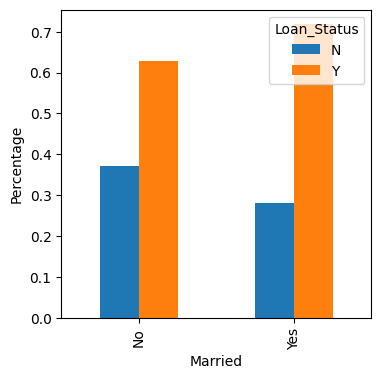

In [41]:
print(pd.crosstab(train['Married'],train['Loan_Status']))
Married_bin=pd.crosstab(train["Married"],train["Loan_Status"])
Married_bin.div(Married_bin.sum(1).astype(float),axis=0).plot(kind="bar",figsize=(4,4))
plt.xlabel("Married")
plt.ylabel("Percentage")
plt.show()

Loan_Status    N    Y
Dependents           
0            113  247
1             36   66
2             25   76
3+            18   33


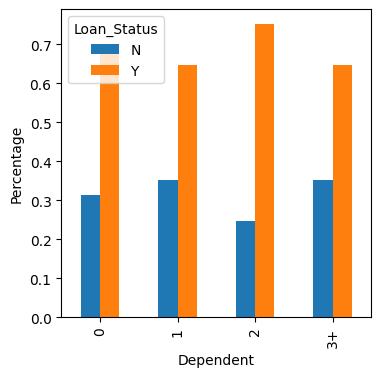

In [42]:
print(pd.crosstab(train['Dependents'],train['Loan_Status']))
Dependents_bin=pd.crosstab(train['Dependents'],train["Loan_Status"])
Dependents_bin.div(Dependents_bin.sum(1).astype(float),axis=0).plot(kind="bar",figsize=(4,4))
plt.xlabel("Dependent")
plt.ylabel("Percentage")
plt.show()

Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82


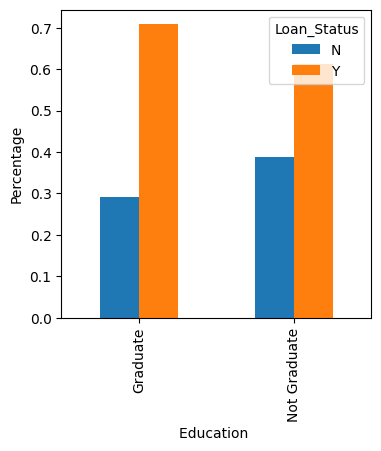

In [43]:
print(pd.crosstab(train['Education'],train['Loan_Status']))
Education_bin=pd.crosstab(train["Education"],train["Loan_Status"])
Education_bin.div(Education_bin.sum(1).astype(float),axis=0).plot(kind="bar",figsize=(4,4))
plt.xlabel("Education ")
plt.ylabel("Percentage")
plt.show()

Loan_Status      N    Y
Self_Employed          
No             166  366
Yes             26   56


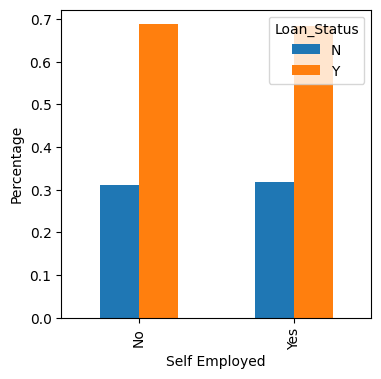

In [44]:
print(pd.crosstab(train['Self_Employed'],train['Loan_Status']))
Self_emp=pd.crosstab(train["Self_Employed"],train["Loan_Status"])
Self_emp.div(Self_emp.sum(1).astype(float),axis=0).plot(kind="bar",figsize=(4,4))
plt.xlabel("Self Employed")
plt.ylabel("Percentage")
plt.show()

Loan_Status      N  Y
ApplicantIncome      
150              1  0
210              0  1
416              1  0
645              0  1
674              0  1
...             .. ..
39147            0  1
39999            0  1
51763            0  1
63337            0  1
81000            1  0

[505 rows x 2 columns]


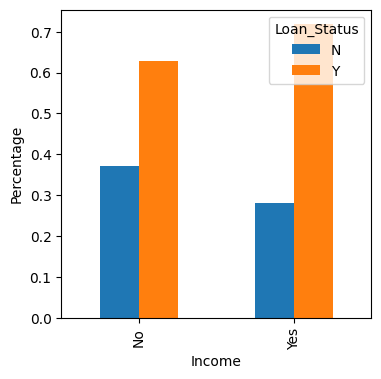

In [45]:
print(pd.crosstab(train['ApplicantIncome'],train['Loan_Status']))
Applicant_income=pd.crosstab(train["Married"],train["Loan_Status"])
Applicant_income.div(Applicant_income.sum(1).astype(float),axis=0).plot(kind="bar",figsize=(4,4))
plt.xlabel("Income")
plt.ylabel("Percentage")
plt.show()

Loan_Status         N    Y
CoapplicantIncome         
0.000000           96  177
16.120001           0    1
189.000000          0    1
240.000000          0    1
242.000000          0    1
...                ..  ...
10968.000000        1    0
11300.000000        1    0
20000.000000        1    1
33837.000000        1    0
41667.000000        1    0

[287 rows x 2 columns]


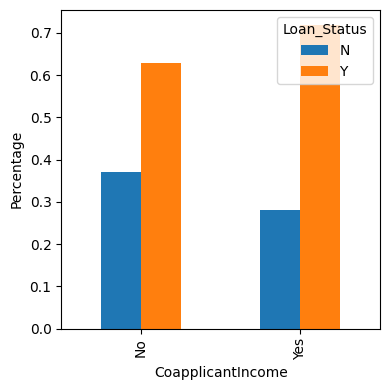

In [46]:
print(pd.crosstab(train['CoapplicantIncome'],train['Loan_Status']))
CoapplicantIncome=pd.crosstab(train["Married"],train["Loan_Status"])
CoapplicantIncome.div(CoapplicantIncome.sum(1).astype(float),axis=0).plot(kind="bar",figsize=(4,4))
plt.xlabel("CoapplicantIncome")
plt.ylabel("Percentage")
plt.tight_layout()
plt.show()

Loan_Status  N  Y
LoanAmount       
9.0          1  0
17.0         0  1
25.0         0  2
26.0         0  1
30.0         0  2
...         .. ..
500.0        1  0
570.0        1  0
600.0        0  2
650.0        0  1
700.0        0  1

[203 rows x 2 columns]


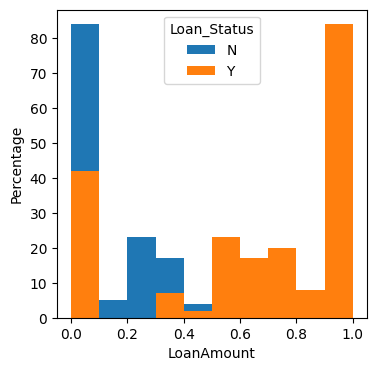

In [47]:
print(pd.crosstab(train['LoanAmount'],train['Loan_Status']))
LoanAmount_bin=pd.crosstab(train["LoanAmount"],train["Loan_Status"])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float),axis=0).plot(kind='hist',figsize=(4,4))
plt.xlabel("LoanAmount")
plt.ylabel("Percentage")
plt.show()

In [48]:
bins = [0,100,200,700]
group=['Low','Average','High']
train["LoanAmount_bin"]=pd.cut(train["LoanAmount"],bins,labels=group)

Loan_Status       N    Y
LoanAmount_bin          
Low              47  107
Average         103  255
High             31   49


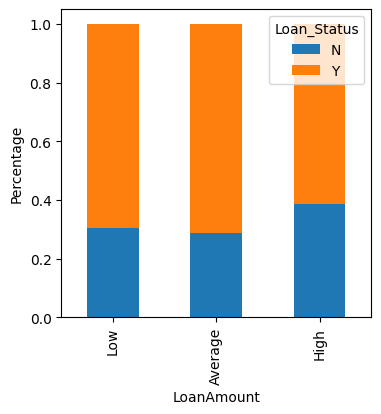

In [49]:
print(pd.crosstab(train["LoanAmount_bin"],train["Loan_Status"]))
LoanAmount=pd.crosstab(train["LoanAmount_bin"],train["Loan_Status"])
LoanAmount.div(LoanAmount.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.xlabel("LoanAmount")
plt.ylabel("Percentage")
plt.show()

<Axes: title={'center': 'Self_Employed'}, xlabel='Self_Employed'>

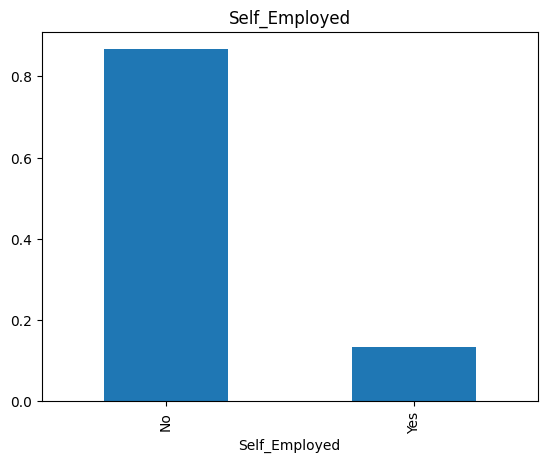

In [50]:
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')

# Analysis on ' credit_history' variable

In [51]:
train["Credit_History"].count()

np.int64(614)

<Axes: title={'center': 'Credit_History'}, xlabel='Credit_History'>

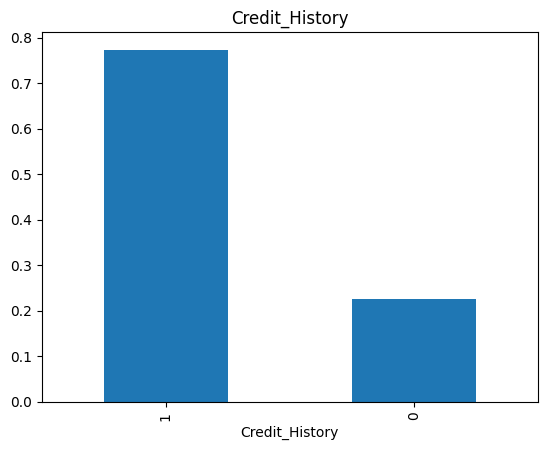

In [52]:
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')

# Analysis on "Dependents" variable :

<Axes: title={'center': 'Dependents'}, xlabel='Dependents'>

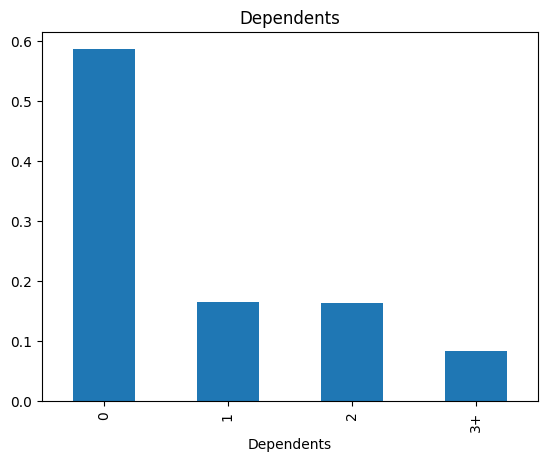

In [53]:
train['Dependents'].value_counts(normalize=True).plot.bar(title="Dependents")

<Axes: title={'center': 'Education'}, xlabel='Education'>

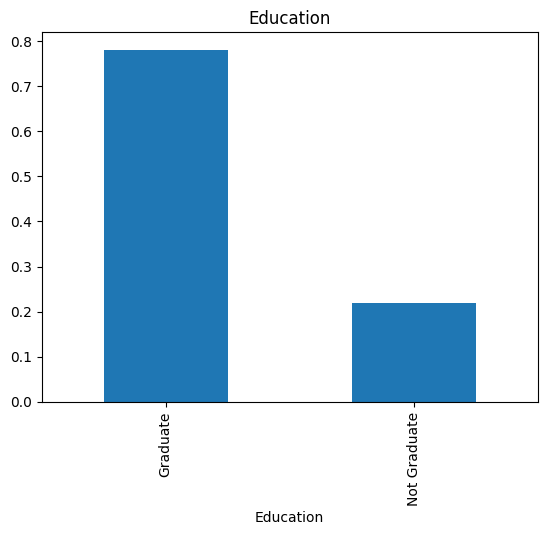

In [54]:
train["Education"].value_counts(normalize=True).plot.bar(title = "Education")

<Axes: title={'center': 'Property_Area'}, xlabel='Property_Area'>

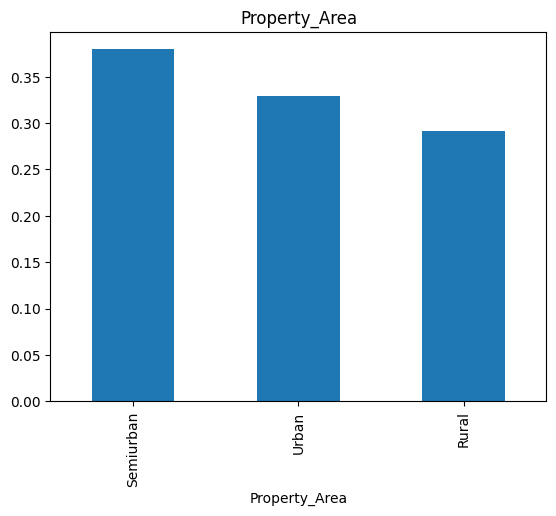

In [55]:
train["Property_Area"].value_counts(normalize=True).plot.bar(title="Property_Area")

# Independent Variable (Numerical)

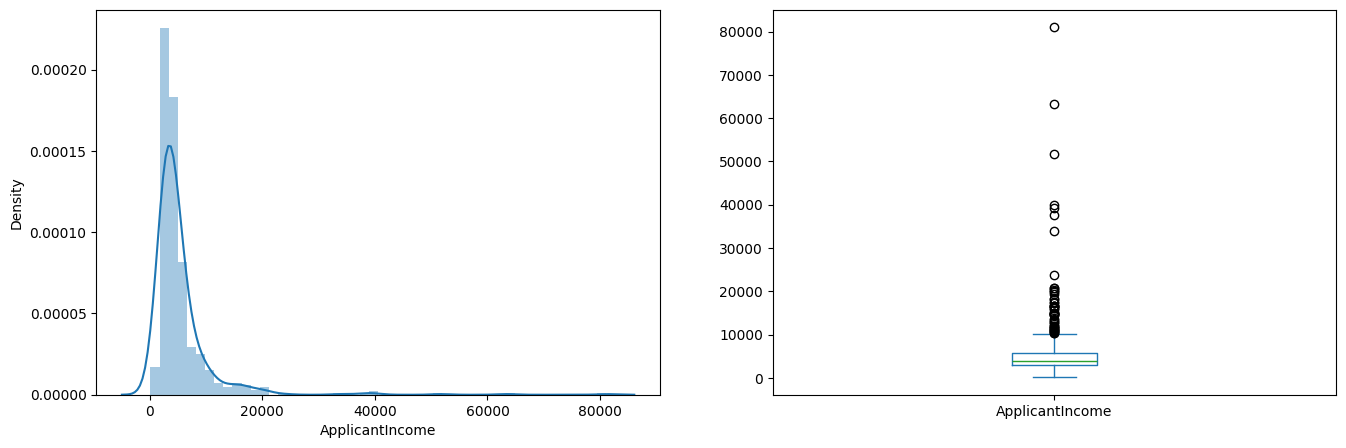

In [56]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train["ApplicantIncome"]);

plt.subplot(122)
train["ApplicantIncome"].plot.box(figsize=(16,5))
plt.show()

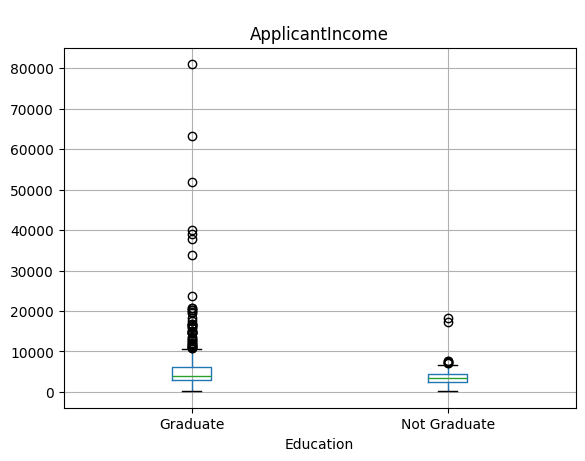

In [57]:
train.boxplot(column='ApplicantIncome',by="Education" )
plt.suptitle(" ")
plt.show()

# Let’s look at the "CoapplicantIncome" distribution:

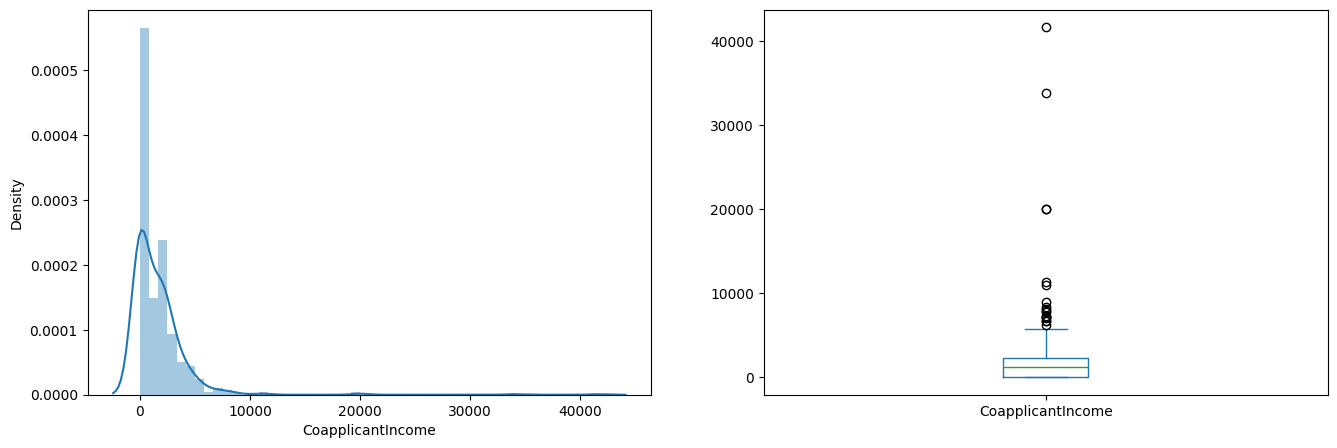

In [58]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train["CoapplicantIncome"]);

plt.subplot(122)
train["CoapplicantIncome"].plot.box(figsize=(16,5))
plt.show()

<Axes: xlabel='LoanAmount', ylabel='Density'>

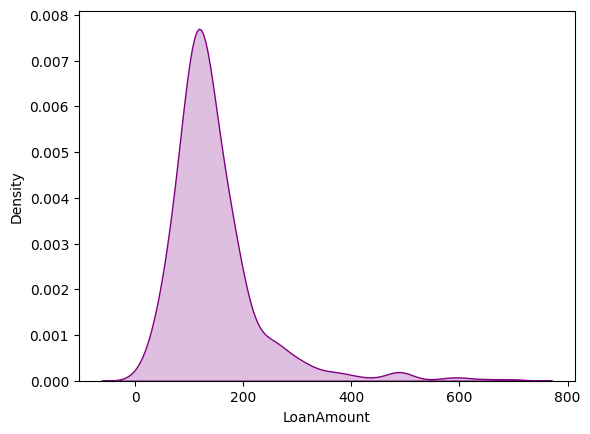

In [59]:
sns.kdeplot(train['LoanAmount'],fill=True,color='purple')

In [60]:
train['Dependents'].replace('3+',3,inplace=True)
test['Dependents'].replace('3+',3,inplace=True)
train['Loan_Status'].replace('N', 0,inplace=True)
train['Loan_Status'].replace('Y', 1,inplace=True)

<Axes: >

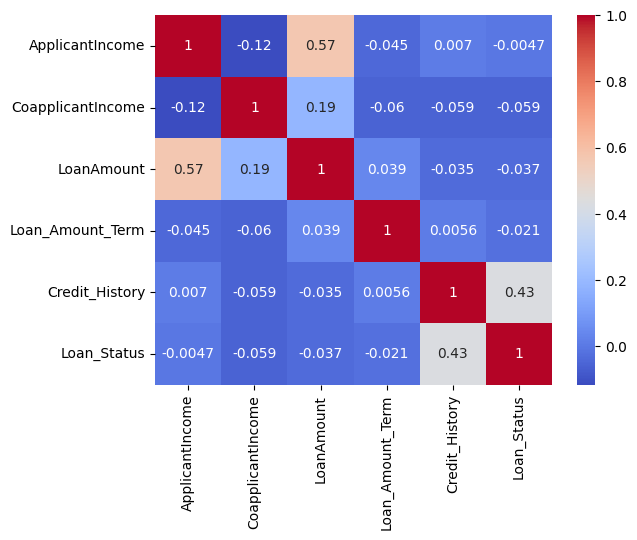

In [61]:
numeric_train = train.select_dtypes(include=['int64', 'float64'])
corr = numeric_train.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')

# Handling outliers

<Axes: >

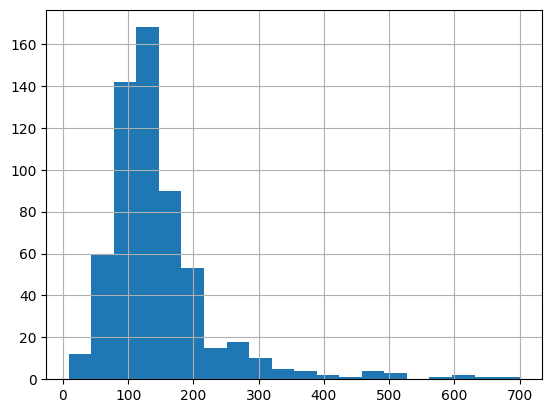

In [62]:
train['LoanAmount'].hist(bins=20)

<Axes: >

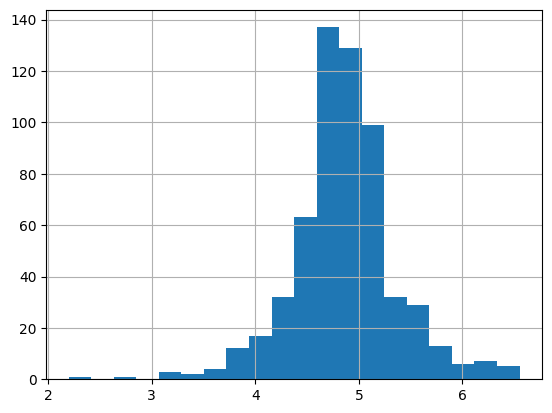

In [63]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)

<Axes: >

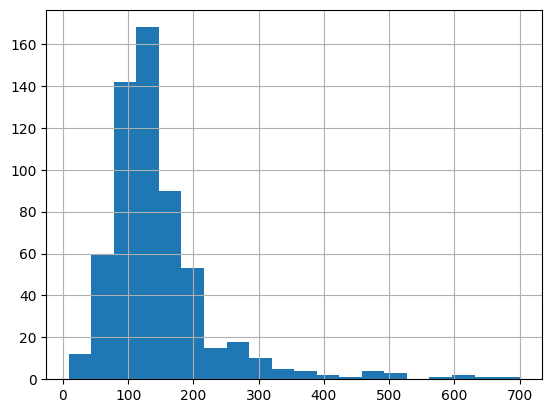

In [64]:
train['LoanAmount'].hist(bins=20)

<Axes: xlabel='LoanAmount_log', ylabel='Density'>

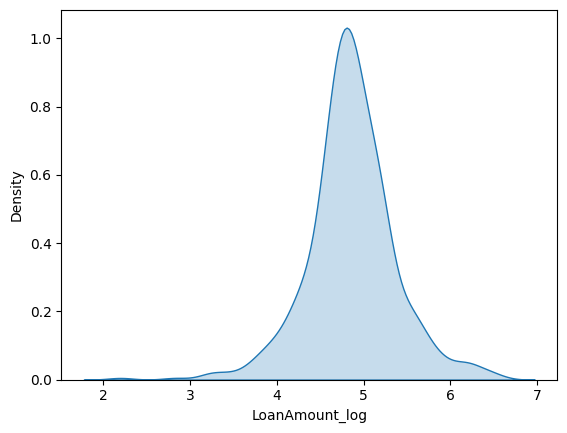

In [65]:
sns.kdeplot(train["LoanAmount_log"],fill=True)

<Axes: >

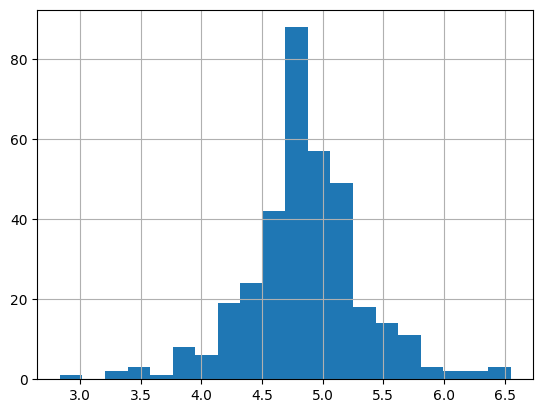

In [66]:
test["LoanAmount_log"]=np.log(train["LoanAmount"])
test['LoanAmount_log'].hist(bins=20)

<Axes: xlabel='LoanAmount_log', ylabel='Density'>

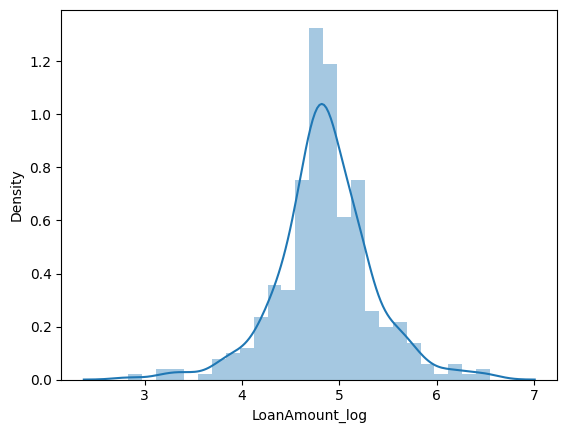

In [67]:
sns.distplot(test["LoanAmount_log"])

# Feature eng

Total Income - As discussed during bivariate analysis we will combine the Applicant Income and Coapplicant Income. If the total income is high, chances of loan approval might also be high.

EMI - EMI is the monthly amount to be paid by the applicant to repay the loan. Idea behind making this variable is that people who have high EMI’s might find it difficult to pay back the loan. We can calculate the EMI by taking the ratio of loan amount with respect to loan amount term.

Balance Income - This is the income left after the EMI has been paid. Idea behind creating this variable is that if this value is high, the chances are high that a person will repay the loan and hence increasing the chances of loan approval.

In [68]:
train["TotalIncome"]=train["ApplicantIncome"]+train["CoapplicantIncome"]

In [69]:
train[["TotalIncome"]].head()

,TotalIncome
0,5849.0
1,6091.0
2,3000.0
3,4941.0
4,6000.0


In [70]:
test["TotalIncome"]=test["ApplicantIncome"]+test["CoapplicantIncome"] 

check the distribution of train dataset Total Income.

<Axes: xlabel='TotalIncome', ylabel='Density'>

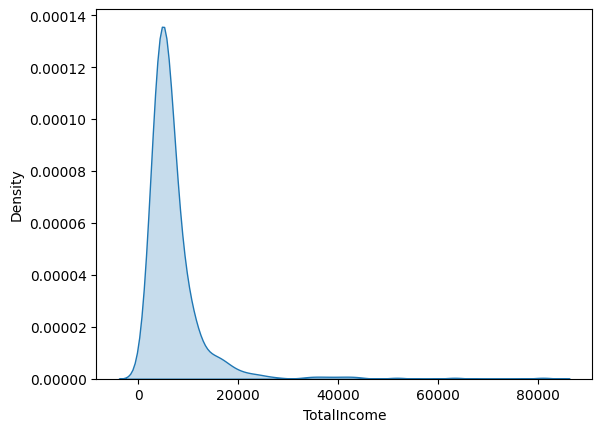

In [71]:
sns.kdeplot(train['TotalIncome'],fill=True)

<Axes: xlabel='TotalIncome_log', ylabel='Density'>

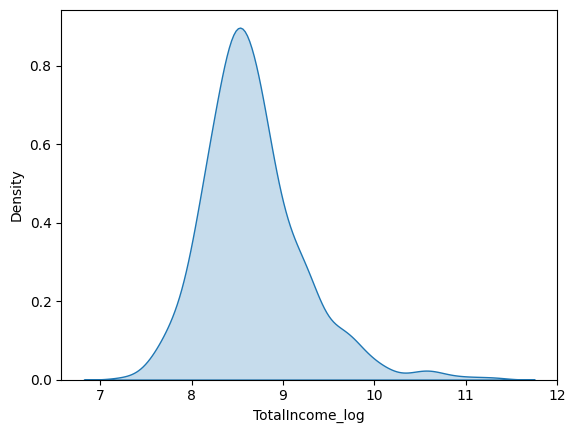

In [72]:
train["TotalIncome_log"]=np.log(train["TotalIncome"])
sns.kdeplot(train["TotalIncome_log"],fill=True)

<Axes: xlabel='TotalIncome', ylabel='Density'>

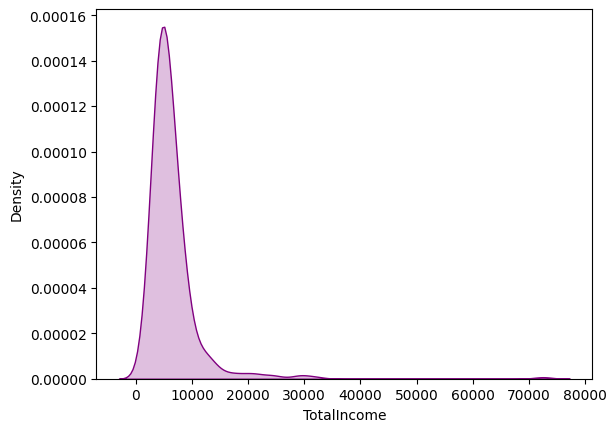

In [73]:
sns.kdeplot(test["TotalIncome"],fill=True,color='purple')

<Axes: xlabel='TotalIncome_log', ylabel='Density'>

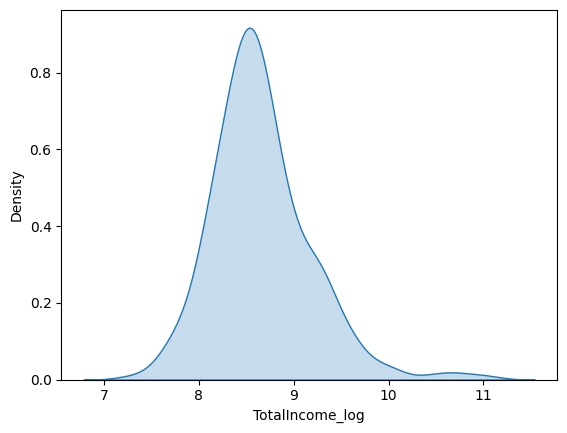

In [74]:
test["TotalIncome_log"] = np.log(train["TotalIncome"])
sns.kdeplot(test["TotalIncome_log"],fill=True)

Now create the EMI feature

In [75]:
train["EMI"]=train["LoanAmount"]/train["Loan_Amount_Term"]
test["EMI"]=test["LoanAmount"]/test["Loan_Amount_Term"]

In [76]:
train[["EMI"]].head()

,EMI
0,NaN
1,0.355556
2,0.183333
3,0.333333
4,0.391667


In [77]:
test[["EMI"]].head()

,EMI
0,0.305556
1,0.350000
2,0.577778
3,0.277778
4,0.216667


<Axes: xlabel='EMI', ylabel='Density'>

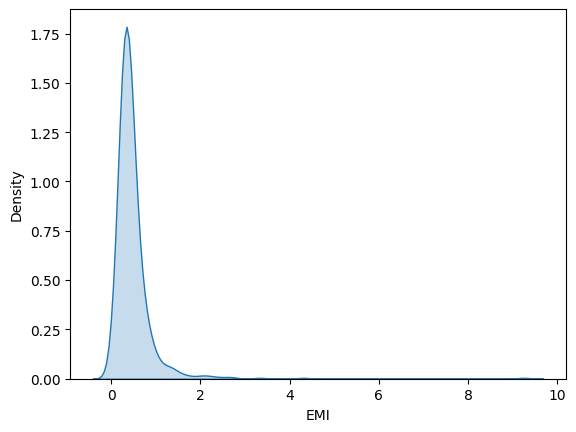

In [78]:
sns.kdeplot(train["EMI"],fill=True)

<Axes: xlabel='EMI', ylabel='Density'>

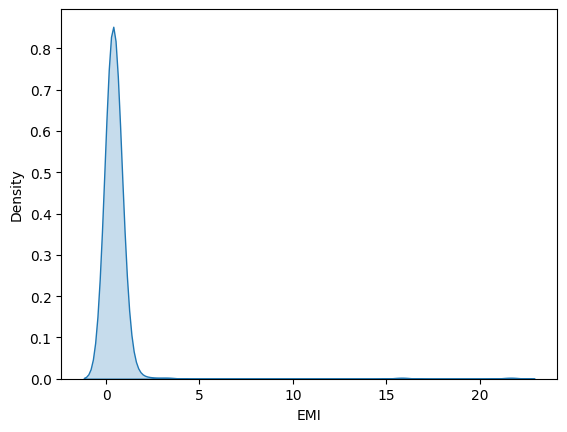

In [79]:
sns.kdeplot(test["EMI"],fill=True)

Let's create Balance Income feature now and check its distribution.

In [80]:
train["Balance_Income"] = train["TotalIncome"]-train["EMI"]*1000 # To make the units equal we multiply with 1000
test["Balance_Income"] = test["TotalIncome"]-test["EMI"]

In [81]:
train[["Balance_Income"]].head()

,Balance_Income
0,NaN
1,5735.444444
2,2816.666667
3,4607.666667
4,5608.333333


In [82]:
test[['Balance_Income']].head()

,Balance_Income
0,5719.694444
1,4575.650000
2,6799.422222
3,4885.722222
4,3275.783333


Let us now drop the variables which we used to create these new features. Reason for doing this is, the correlation between those old features and these new features will be very high and logistic regression assumes that the variables are not highly correlated. We also wants to remove the noise from the dataset, so removing correlated features will help in reducing the noise too.

In [83]:
train=train.drop(["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"],axis=1)

In [84]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmount_bin,LoanAmount_log,TotalIncome,TotalIncome_log,EMI,Balance_Income
0,LP001002,Male,No,0,Graduate,No,1,Urban,1,NaN,NaN,5849.0,8.674026,NaN,NaN
1,LP001003,Male,Yes,1,Graduate,No,1,Rural,0,Average,4.852030,6091.0,8.714568,0.355556,5735.444444
2,LP001005,Male,Yes,0,Graduate,Yes,1,Urban,1,Low,4.189655,3000.0,8.006368,0.183333,2816.666667
3,LP001006,Male,Yes,0,Not Graduate,No,1,Urban,1,Average,4.787492,4941.0,8.505323,0.333333,4607.666667
4,LP001008,Male,No,0,Graduate,No,1,Urban,1,Average,4.948760,6000.0,8.699515,0.391667,5608.333333


In [85]:
test = test.drop(["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"],axis=1)

In [86]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,LoanAmount_log,TotalIncome,TotalIncome_log,EMI,Balance_Income
0,LP001015,Male,Yes,0,Graduate,No,1.0,Urban,NaN,5720,8.674026,0.305556,5719.694444
1,LP001022,Male,Yes,1,Graduate,No,1.0,Urban,4.852030,4576,8.714568,0.350000,4575.650000
2,LP001031,Male,Yes,2,Graduate,No,1.0,Urban,4.189655,6800,8.006368,0.577778,6799.422222
3,LP001035,Male,Yes,2,Graduate,No,1.0,Urban,4.787492,4886,8.505323,0.277778,4885.722222
4,LP001051,Male,No,0,Not Graduate,No,1.0,Urban,4.948760,3276,8.699515,0.216667,3275.783333


# Model Building

We will build the following models in this section.

i)Logistic Regression

ii)Decision Tree

iii)Random Forest

iv)Random Forest with Grid Search

v)XGBClassifier

In [87]:
# Drop "Loan_ID"


train=train.drop("Loan_ID",axis=1)
test=test.drop("Loan_ID",axis=1)

In [88]:
train.head(3)

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmount_bin,LoanAmount_log,TotalIncome,TotalIncome_log,EMI,Balance_Income
0,Male,No,0,Graduate,No,1,Urban,1,NaN,NaN,5849.0,8.674026,NaN,NaN
1,Male,Yes,1,Graduate,No,1,Rural,0,Average,4.852030,6091.0,8.714568,0.355556,5735.444444
2,Male,Yes,0,Graduate,Yes,1,Urban,1,Low,4.189655,3000.0,8.006368,0.183333,2816.666667


In [89]:
test.head(3)

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,LoanAmount_log,TotalIncome,TotalIncome_log,EMI,Balance_Income
0,Male,Yes,0,Graduate,No,1.0,Urban,NaN,5720,8.674026,0.305556,5719.694444
1,Male,Yes,1,Graduate,No,1.0,Urban,4.852030,4576,8.714568,0.350000,4575.650000
2,Male,Yes,2,Graduate,No,1.0,Urban,4.189655,6800,8.006368,0.577778,6799.422222


In [90]:
X=train.drop("Loan_Status",axis=1)

In [91]:
X.head(2)

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,LoanAmount_bin,LoanAmount_log,TotalIncome,TotalIncome_log,EMI,Balance_Income
0,Male,No,0,Graduate,No,1,Urban,NaN,NaN,5849.0,8.674026,NaN,NaN
1,Male,Yes,1,Graduate,No,1,Rural,Average,4.85203,6091.0,8.714568,0.355556,5735.444444


In [92]:
y=train[["Loan_Status"]]

In [93]:
y.head(2)

,Loan_Status
0,1
1,0


Now we will make dummy variables for the categorical variables. Dummy variable turns categorical variables into a series of 0 and 1, making them lot easier to quantify and compare.

Let us understand the process of dummies first:

In [94]:
X = pd.get_dummies(X)

# Fill all NaN values with 0 (or you can choose another value)
X = X.fillna(0)

# Now convert boolean + floats to int
X = X.astype(int)


In [95]:
X.head(3)

,Credit_History,LoanAmount_log,TotalIncome,TotalIncome_log,EMI,Balance_Income,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,LoanAmount_bin_Low,LoanAmount_bin_Average,LoanAmount_bin_High
0,1,0,5849,8,0,0,0,1,1,0,...,1,0,1,0,0,0,1,0,0,0
1,1,4,6091,8,0,5735,0,1,0,1,...,1,0,1,0,1,0,0,0,1,0
2,1,4,3000,8,0,2816,0,1,0,1,...,1,0,0,1,0,0,1,1,0,0


In [96]:
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [97]:
train.head()

,Credit_History,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log,EMI,Balance_Income,Gender_Female,Gender_Male,Married_No,...,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,LoanAmount_bin_Low,LoanAmount_bin_Average,LoanAmount_bin_High
0,1,1,NaN,5849.0,8.674026,NaN,NaN,False,True,True,...,True,False,True,False,False,False,True,False,False,False
1,1,0,4.852030,6091.0,8.714568,0.355556,5735.444444,False,True,False,...,True,False,True,False,True,False,False,False,True,False
2,1,1,4.189655,3000.0,8.006368,0.183333,2816.666667,False,True,False,...,True,False,False,True,False,False,True,True,False,False
3,1,1,4.787492,4941.0,8.505323,0.333333,4607.666667,False,True,False,...,False,True,True,False,False,False,True,False,True,False
4,1,1,4.948760,6000.0,8.699515,0.391667,5608.333333,False,True,True,...,True,False,True,False,False,False,True,False,True,False


In [98]:
test.head()

,Credit_History,LoanAmount_log,TotalIncome,TotalIncome_log,EMI,Balance_Income,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1.0,NaN,5720,8.674026,0.305556,5719.694444,False,True,False,True,...,True,False,False,True,False,True,False,False,False,True
1,1.0,4.852030,4576,8.714568,0.350000,4575.650000,False,True,False,True,...,False,True,False,True,False,True,False,False,False,True
2,1.0,4.189655,6800,8.006368,0.577778,6799.422222,False,True,False,True,...,False,False,True,True,False,True,False,False,False,True
3,1.0,4.787492,4886,8.505323,0.277778,4885.722222,False,True,False,True,...,False,False,True,True,False,True,False,False,False,True
4,1.0,4.948760,3276,8.699515,0.216667,3275.783333,False,True,True,False,...,True,False,False,False,True,True,False,False,False,True


# Now train model using algo

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
x_train,x_cv,y_train,y_cv=train_test_split(X,y,test_size=0.3,random_state=1)

# Logistic Regression

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [102]:
logistic_model = LogisticRegression(random_state=1)

In [103]:
logistic_model.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,1
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


Let’s predict the Loan_Status for validation set

In [104]:
pred_cv_logistic=logistic_model.predict(x_cv)

In [105]:
# Now calculate how accurate our predictions are by calculating the accuracy.

score_logistic =accuracy_score(pred_cv_logistic,y_cv)*100 

In [106]:
score_logistic

74.05405405405405

So our predictions are almost 74% accurate, i.e. we have identified 79% of the loan status correctly for our logistic regression model.



# Decision Tree

In [107]:
# Let's import Decison Tree Classifier

from sklearn.tree import DecisionTreeClassifier, plot_tree

In [108]:
tree_model = DecisionTreeClassifier(random_state=10)

In [109]:
tree_model.fit(x_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,10
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [110]:
pred_cv_tree=tree_model.predict(x_cv)

In [111]:
score_tree =accuracy_score(pred_cv_tree,y_cv)*100 

In [112]:
score_tree

70.8108108108108

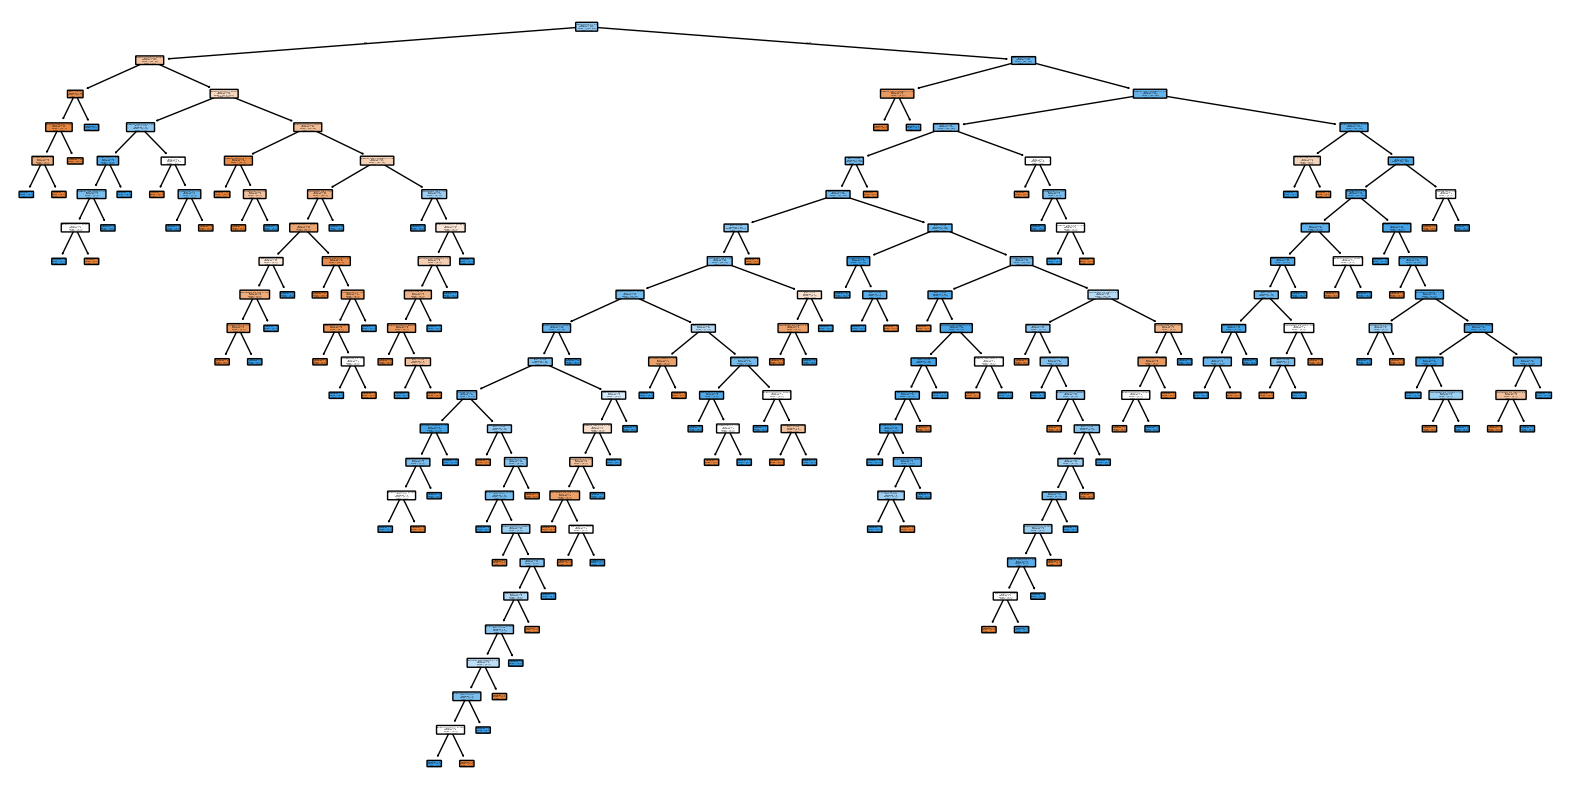

In [113]:
plt.figure(figsize=(20,10))   # bigger size
plot_tree(tree_model,
          filled=True,        # color nodes
          rounded=True,       # round corners
          feature_names=x_train.columns,  # column names
          class_names=True
         )
plt.show()

I got 70 % accuracy on decision tree algorithm

# Random Forest

i)RandomForest is a tree based bootstrapping algorithm wherein a certain no. of weak learners (decision trees) are combined to make a powerful prediction model

In [114]:
from sklearn.ensemble import RandomForestClassifier

In [115]:
forest_model = RandomForestClassifier(random_state=1,max_depth=10,n_estimators=50)

In [116]:
forest_model.fit(x_train,y_train)

,n_estimators,50
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [117]:
pred_cv_forest=forest_model.predict(x_cv)

In [118]:
score_forest = accuracy_score(pred_cv_forest,y_cv)*100

In [119]:
score_forest

72.97297297297297

our predictions are almost 78% accurate, i.e. we have identified 78% of the loan status correctly for our Random Forest model.



# XGBoost

XGBoost is a fast and efficient algorithm.XGBoost works only with numeric variables and we have already replaced the categorical variables with numeric variables.



In [120]:
from xgboost import XGBClassifier

In [121]:
xgb_model = XGBClassifier(n_estimators=50,max_depth=4)

In [122]:
xgb_model.fit(x_train,y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [123]:
pred_xgb=xgb_model.predict(x_cv)

In [124]:
score_xgb = accuracy_score(pred_xgb,y_cv)*100

In [125]:
score_xgb

72.43243243243244

<Axes: >

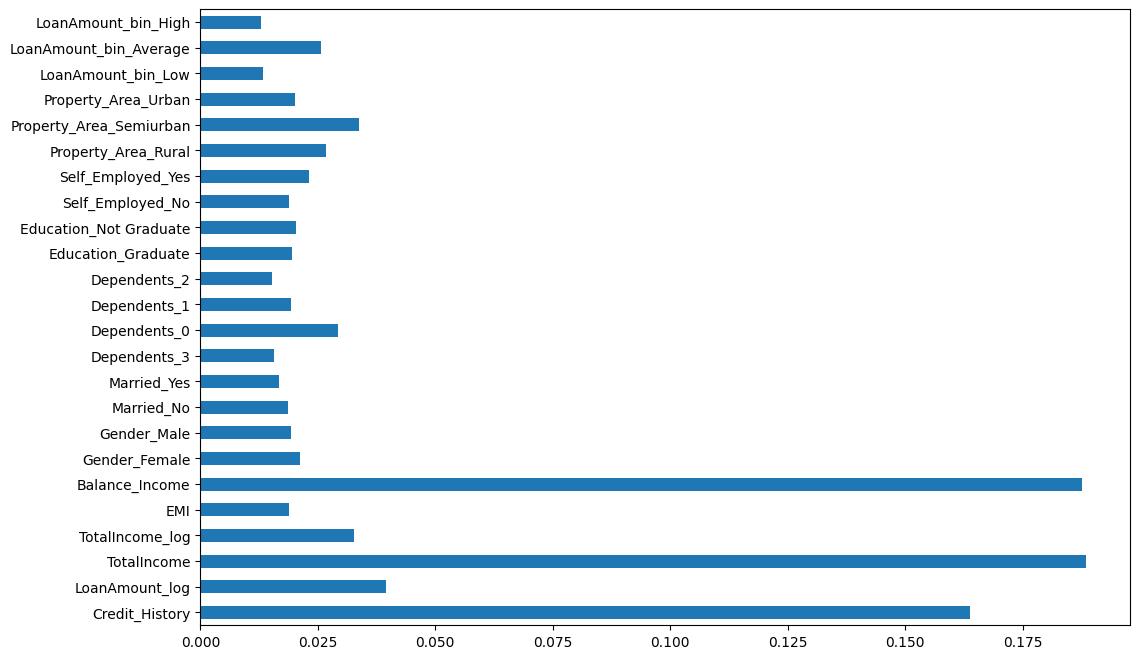

In [126]:
importances = pd.Series(forest_model.feature_importances_,index=X.columns)
importances.plot(kind='barh', figsize=(12,8))